# Normal climatológica de precipitação e temperatura 
Estação 1006 - Florianópolis - Cetre/Epagri <br> 
Período analisado: Jan/2002 a Dez/2024

In [1]:
import pandas as pd
import locale
import matplotlib.pyplot as plt

## Precipitação 

In [2]:
# Dados de entrada
pasta = "C:\\ENS\\LAUTEC\\Inputs\\Normal_climatologica"
precipitacao = pd.read_excel(pasta+'\\precipitacao_diaria_ate_20_01_25.xls',
                             header=8,
                             index_col=0) 

In [3]:
# Somatório 
precipitacao = precipitacao.resample('ME').sum()

# Extrair dados de Jan/2002 a Dez/2024
precipitacao = precipitacao.loc[(precipitacao.index >= '2002-01-01')&(
    precipitacao.index <= '2024-12-31')]

# Coluna com o mês
precipitacao['Mês'] = precipitacao.index.month 

# Excluir meses em que a soma foi zero (problemas de medição) 
precipitacao = precipitacao.loc[~(precipitacao['Soma Diária'] == 0)] 

# Salvar planilha 
#precipitacao.to_excel(pasta+'\\resultados.xlsx') 

In [4]:
# Extrair valores mínimos, médios e máximos
prec_min = precipitacao.groupby('Mês').min()
prec_med = precipitacao.groupby('Mês').mean() 
prec_max = precipitacao.groupby('Mês').max()

## Temperatura 

In [5]:
# Dados de entrada 
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252') # Para reconhecer que as datas estão em português 
temp_min = pd.read_excel(pasta+'\\temp_min_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_min.index =  pd.to_datetime(temp_min.index, format='%d/%m/%Y %H:%M') 

temp_med = pd.read_excel(pasta+'\\temp_med_mensal_ate_20_01_25.xls',
                             header=8,
                             index_col=0)
temp_med.index = pd.to_datetime(temp_med.index, format='%b %Y')

temp_max = pd.read_excel(pasta+'\\temp_max_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_max.index =  pd.to_datetime(temp_max.index, format='%d/%m/%Y %H:%M')  

In [6]:
# Extrair dados de Jan/2002 a Dez/2024
temp_min = temp_min.loc[(temp_min.index >= '2002-01-01')&(
    temp_min.index <= '2024-12-31')]
temp_med = temp_med.loc[(temp_med.index >= '2002-01-01')&(
    temp_med.index <= '2024-12-31')]
temp_max = temp_max.loc[(temp_max.index >= '2002-01-01')&(
    temp_max.index <= '2024-12-31')]


# Coluna com o mês
temp_min['Mês'] = temp_min.index.month 
temp_med['Mês'] = temp_med.index.month 
temp_max['Mês'] = temp_max.index.month 

In [7]:
# Extrair valores mínimos, médios e máximos
temp_min = temp_min.groupby('Mês').min()
temp_med = temp_med.groupby('Mês').mean() 
temp_max = temp_max.groupby('Mês').max()

## Gráfico

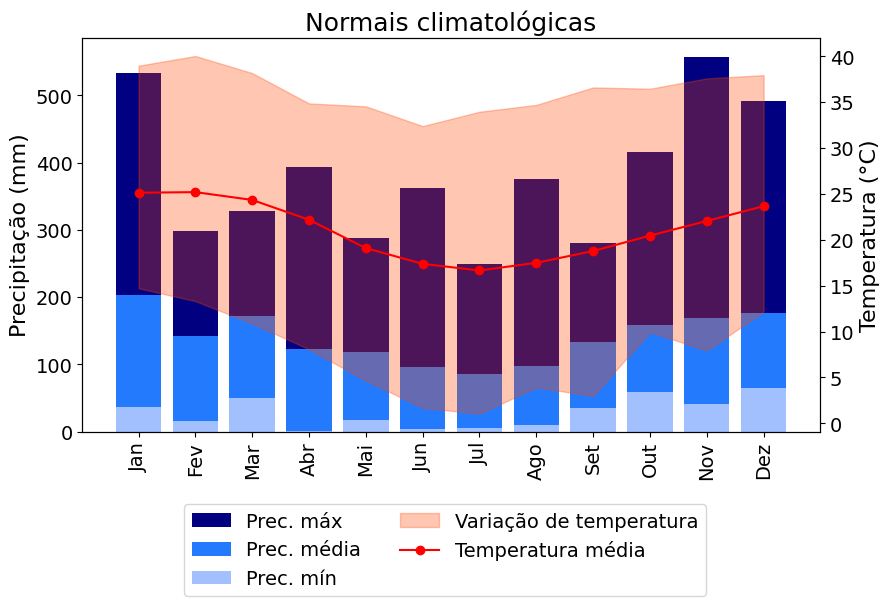

In [39]:
# Gráfico 
rotulos = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
           'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'] 

fig, ax1 = plt.subplots(figsize=(9,5)) 

ax2 = ax1.twinx()
ax2.fill_between(temp_med.index, 
                 temp_min['Mínimo Mensal'], 
                 temp_max['Máximo Mensal'], 
                 color='orangered', 
                 alpha=0.3, 
                 label='Variação de temperatura')
temp, = ax2.plot(temp_med.index,
                 temp_med['Média Mensal'],
                 marker='o',
                 color='red',
                 label='Temperatura média')

ax1.bar(prec_max.index, 
        prec_max['Soma Diária'], 
        color='navy', 
        label='Prec. máx')
ax1.bar(prec_med.index, 
        prec_med['Soma Diária'], 
        color='xkcd:clear blue',
        label='Prec. média')
ax1.bar(prec_min.index, 
        prec_min['Soma Diária'],
        color='xkcd:pastel blue',
        label='Prec. mín')
'''
ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
'''
ax1.set_xticks(prec_med.index)  # Define as posições dos ticks
ax1.set_xticklabels(rotulos, rotation=90)  

ax1.set_ylabel('Precipitação (mm)', fontsize=16)
ax2.set_ylabel('Temperatura (°C)', fontsize=16) 
plt.title('Normais climatológicas', fontsize=18) 

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

fig.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 0), 
           ncol=2, 
           fontsize=14)

fig.tight_layout()
plt.savefig("C:\\ENS\\LAUTEC\\Outputs\\normais_climatologicas.png",
            bbox_inches='tight')

In [9]:
prec_min

,Soma Diária,Registros,Falhas
Mês,,,
1,35.80,465,0
2,15.20,120,0
3,49.48,600,0
4,1.40,600,0
5,16.80,168,0
6,4.29,536,0
7,4.55,288,0
8,9.37,712,0
9,35.51,576,0


In [10]:
prec_med

,Soma Diária,Registros,Falhas
Mês,,,
1,203.334091,726.636364,3.181818
2,142.130000,601.727273,2.636364
3,171.842273,732.727273,1.454545
4,122.780455,711.545455,1.909091
5,117.822273,700.045455,3.590909
6,96.181364,704.454545,3.545455
7,85.102609,711.260870,2.478261
8,96.973043,740.086957,3.913043
9,132.606522,710.695652,3.043478


In [11]:
prec_max

,Soma Diária,Registros,Falhas
Mês,,,
1,534.00,744,16
2,298.62,696,32
3,328.60,744,19
4,393.00,720,22
5,287.14,744,50
6,361.60,720,42
7,249.60,744,36
8,375.85,744,32
9,280.37,720,30


In [12]:
temp_min

,Mínimo Mensal,Registros,Falhas
Mês,,,
1,14.72,18,0
2,13.32,18,0
3,10.88,28,0
4,8.07,25,0
5,4.65,10,0
6,1.69,3,0
7,1.05,14,0
8,3.91,27,0
9,2.98,24,0


In [13]:
temp_med

,Média Mensal,Registros,Falhas
Mês,,,
1,25.135948,30.045455,0.954545
2,25.200319,26.909091,1.363636
3,24.350488,30.318182,0.681818
4,22.186008,29.227273,0.772727
5,19.098182,28.409091,2.590909
6,17.383571,28.363636,1.636364
7,16.660560,29.173913,1.826087
8,17.493592,30.260870,0.739130
9,18.779781,29.217391,0.782609


In [14]:
temp_max

,Máximo Mensal,Registros,Falhas
Mês,,,
1,38.98,31,12
2,40.04,29,11
3,38.18,31,3
4,34.87,30,5
5,34.55,31,22
6,32.40,30,26
7,33.96,31,16
8,34.71,31,4
9,36.61,30,6
